# UberEats配達データ分析

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [3]:
FILE_PATH = './../data/trip_master.csv'
master = pd.read_csv(FILE_PATH, index_col='id')

In [4]:
print(len(master))
# master.head(5)

189


In [5]:
master.columns

Index(['date', 'day', 'day_of_week', 'distance', 'drive_time', 'drop_address',
       'drop_latitude', 'drop_longitude', 'drop_time', 'month',
       'pickup_address', 'pickup_latitude', 'pickup_longitude', 'pickup_time',
       'price', 'url', 'year', 'cash', 'peak'],
      dtype='object')

In [6]:
df = master.assign(
    pickup_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.pickup_time.split(':')[0]), minute=int(x.pickup_time.split(':')[1])), axis=1),
    drop_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.drop_time.split(':')[0]), minute=int(x.drop_time.split(':')[1])), axis=1),    
    shop_position_id = master.apply(lambda x: str(x.pickup_latitude) + "-" + str(x.pickup_longitude), axis=1)
                  ) .drop(['date', 'day', 'year', 'url', 'pickup_latitude', 'pickup_time', 'pickup_longitude', 'pickup_address', 
                           'day_of_week', 'pickup_time', 'drop_time', "drop_address", "drop_latitude", "drop_longitude"], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, d92f23b6-46a8-48d7-823c-8cadb9182193 to 64bafcdf-a623-4dcc-940b-ecee4c0cf1cd
Data columns (total 9 columns):
distance            189 non-null float64
drive_time          189 non-null float64
month               189 non-null int64
price               189 non-null int64
cash                16 non-null float64
peak                16 non-null float64
pickup_datetime     189 non-null datetime64[ns]
drop_datetime       189 non-null datetime64[ns]
shop_position_id    189 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(1)
memory usage: 14.8+ KB


In [8]:
df['date'] = df['pickup_datetime'].dt.date
df['day_of_week_num'] = df['pickup_datetime'].dt.dayofweek
df['day_of_week'] = df['pickup_datetime'].dt.weekday_name
df['month_day_num'] = df['pickup_datetime'].dt.day
df["hour_of_day"] = df['pickup_datetime'].dt.hour
df["week_of_month"] = df['pickup_datetime'].dt.week

In [9]:
df.head(3)

,distance,drive_time,month,price,cash,peak,pickup_datetime,drop_datetime,shop_position_id,date,day_of_week_num,day_of_week,month_day_num,hour_of_day,week_of_month
id,,,,,,,,,,,,,,,
d92f23b6-46a8-48d7-823c-8cadb9182193,0.51,7.6,12,401,NaN,NaN,2019-12-26 13:52:00,2019-12-26 14:07:00,35.58022689819336-139.66342163085938,2019-12-26,3,Thursday,26,13,52
d9401bf2-68ed-42ee-8325-1f2698c1e86f,3.59,27.6,12,584,NaN,NaN,2019-12-26 17:12:00,2019-12-26 17:42:00,35.565433502197266-139.65289306640622,2019-12-26,3,Thursday,26,17,52
8cd65eff-a081-47ee-a6e1-82ebc00f066a,2.29,26.1,12,666,NaN,NaN,2019-12-26 12:58:00,2019-12-26 13:34:00,35.5733528137207-139.65725708007812,2019-12-26,3,Thursday,26,12,52


## 毎日のデータ集計

In [10]:
target_day = datetime.datetime(2020, 1, 13).date()
# target_day = datetime.datetime.today().date()
df_day = df[df["date"] == target_day]

In [11]:
df_day

,distance,drive_time,month,price,cash,peak,pickup_datetime,drop_datetime,shop_position_id,date,day_of_week_num,day_of_week,month_day_num,hour_of_day,week_of_month
id,,,,,,,,,,,,,,,
607552de-8dfb-4466-bda3-3bd2d8c0bfd6,1.71,13.2,1,525,1988.0,100.0,2020-01-13 11:58:00,2020-01-13 12:18:00,35.581207275390625-139.64134216308594,2020-01-13,0,Monday,13,11,3
50ec88a2-d922-4f98-9d82-e49af0c939b7,0.85,11.5,1,539,2114.0,160.0,2020-01-13 20:02:00,2020-01-13 20:25:00,35.58124542236328-139.64158630371094,2020-01-13,0,Monday,13,20,3
61b77e10-8157-4289-959c-33f5ba56c805,0.84,9.5,1,528,1019.0,150.0,2020-01-13 17:22:00,2020-01-13 17:38:00,35.58712387084961-139.63056945800778,2020-01-13,0,Monday,13,17,3
4e78f441-3535-433c-b721-398de091fa85,0.79,9.5,1,375,1322.0,0.0,2020-01-13 11:02:00,2020-01-13 11:21:00,35.57943344116211-139.63917541503906,2020-01-13,0,Monday,13,11,3
f1a6da37-1e0e-445f-8fc1-52a607adfb08,1.45,11.3,1,530,2032.0,120.0,2020-01-13 19:15:00,2020-01-13 19:31:00,35.58119201660156-139.64138793945312,2020-01-13,0,Monday,13,19,3
2ded3a4b-ce4e-4daa-9f2d-cf356f1a4fe6,1.27,19.8,1,531,0.0,0.0,2020-01-13 19:47:00,2020-01-13 20:07:00,35.581172943115234-139.64151000976562,2020-01-13,0,Monday,13,19,3
33d6207a-70de-467d-9795-de995e1dc405,0.98,11.7,1,506,0.0,0.0,2020-01-13 20:54:00,2020-01-13 21:06:00,35.5811767578125-139.64138793945312,2020-01-13,0,Monday,13,20,3
f246eac0-cc7a-489c-923b-61cf765a5b1a,1.34,10.4,1,585,0.0,0.0,2020-01-13 12:22:00,2020-01-13 12:41:00,35.57703018188477-139.65081787109378,2020-01-13,0,Monday,13,12,3
a6251403-78dc-4bd2-b543-491d03c39523,1.75,13.5,1,428,1300.0,0.0,2020-01-13 16:05:00,2020-01-13 16:36:00,35.581871032714844-139.64122009277344,2020-01-13,0,Monday,13,16,3


In [12]:
drive_count = len(df_day)
drive_hours = round(df_day["drive_time"].sum() / 60, 1)
drive_length = round(df_day["distance"].sum() , 2)
total_price = df_day["price"].sum()
long_count = len(df_day[df_day["distance"] >= 2])
cash_count = len(df_day[df_day["cash"] != 0])
peak_count = len(df_day[df_day["peak"] != 0])

In [13]:
print("{}  配達件数: {}件, 配達時間: {}h, 配達距離: {}km, 配達報酬: {}円, ロッグドロップ{}件, ピーク{}件, 現金{}件"
      .format(target_day, drive_count, drive_hours, drive_length, total_price, long_count, peak_count, cash_count))

2020-01-13  配達件数: 16件, 配達時間: 3.5h, 配達距離: 23.44km, 配達報酬: 8506円, ロッグドロップ4件, ピーク8件, 現金10件


## 日別の集計

In [14]:
groupby = df.groupby('date')

In [15]:
df_by_day = pd.DataFrame()
df_by_day["配達件数"] = groupby["pickup_datetime"].count()
df_by_day["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_day["配達距離(km)"] = groupby["distance"].sum()
df_by_day["配達報酬(円)"] = groupby["price"].sum()
df_by_day["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_day["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_day["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_day["1kmあたりの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)

In [16]:
df_by_day.index.name = '月日'
df_by_day.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数,1kmあたりの時間(分)
月日,,,,,,,,
2019-12-11,2,1.1,4.41,902,1,0,0,14.6
2019-12-12,3,1.2,4.75,1254,1,0,0,14.7
2019-12-13,7,2.7,14.01,3223,3,0,0,11.5
2019-12-15,9,3.6,12.91,4559,2,0,0,16.5
2019-12-16,7,2.1,6.48,3119,0,0,0,19.4
2019-12-17,3,1.5,5.29,1588,1,0,0,16.8
2019-12-18,7,3.4,18.90,3570,4,0,0,10.7
2019-12-19,11,4.0,24.32,5492,6,0,0,9.9
2019-12-24,11,3.6,15.82,5341,0,0,0,13.6


## 週別の集計

In [17]:
groupby = df.groupby('week_of_month')

In [18]:
df_by_week = pd.DataFrame()
df_by_week["配達件数"] = groupby["pickup_datetime"].count()
df_by_week["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_week["配達距離(km)"] = groupby["distance"].sum()
df_by_week["配達報酬(円)"] = groupby["price"].sum()
df_by_week["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_week["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_week["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_week["1kmあたりの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)

In [19]:
df_by_week.index.name = '週番号'
df_by_week.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数
週番号,,,,,,,
1,26,6.5,40.66,12875,7,0,0
2,59,15.0,88.88,26269,13,0,0
3,16,3.5,23.44,8506,4,8,10
50,21,8.5,36.08,9938,7,0,0
51,28,11.0,54.99,13769,11,0,0
52,39,10.6,61.73,19793,7,0,0


## 月別の集計

In [20]:
groupby = df.groupby('month')
df_by_month = pd.DataFrame()
df_by_month["配達件数"] = groupby["pickup_datetime"].count()
df_by_month["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_month["配達距離(km)"] = groupby["distance"].sum()
df_by_month["配達報酬(円)"] = groupby["price"].sum()
df_by_month["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_month["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_month["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_day["1kmあたりの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)

In [21]:
df_by_month.index.name = '月'
df_by_month

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数
月,,,,,,,
1,89,21.9,136.01,42413,22,8,10
12,100,33.1,169.77,48737,27,0,0


## 全データ分析

Text(0.5, 1.0, '曜日ごとの配達回数')

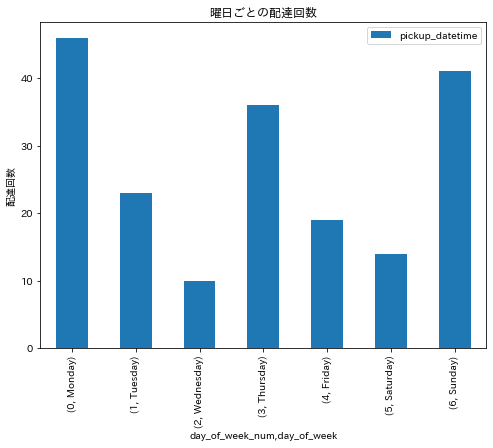

In [22]:
uber_weekdays = df.pivot_table(index=['day_of_week_num','day_of_week'],
                                  values='pickup_datetime',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('曜日ごとの配達回数')

Text(0.5, 1.0, '日にちごとの配達回数')

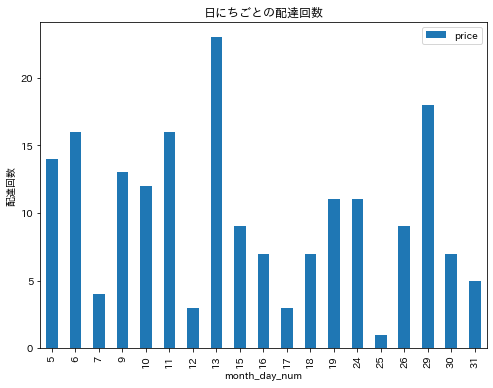

In [23]:
uber_monthdays = df.pivot_table(index=['month_day_num'],
                                  values='price',
                                  aggfunc='count')
uber_monthdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('日にちごとの配達回数')

Text(0.5, 1.0, '時間ごとの配達回数')

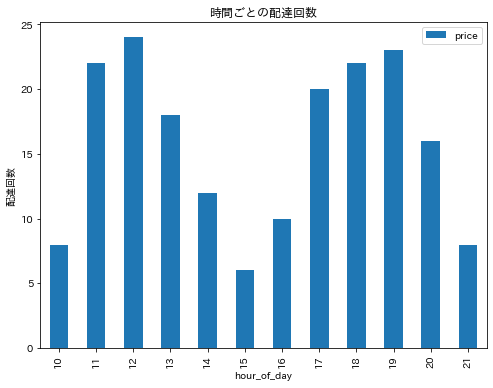

In [24]:
uber_hour = df.pivot_table(index=['hour_of_day'],
                                  values='price',
                                  aggfunc='count')
uber_hour.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('時間ごとの配達回数')

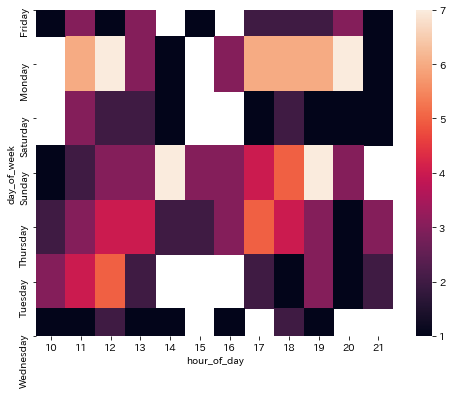

In [25]:
def count_rows(rows):
    return len(rows)

by_cross = df.groupby('day_of_week hour_of_day'.split()).apply(count_rows).unstack()
sns.heatmap(by_cross)